# Дробное дифференцирование

In [1]:
import numpy as np
import pandas as pd 

import pandas_datareader.data as web

# настройки визуализации
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

## Функции для дробного дифференцирования

[Источник](https://www.kaggle.com/code/elvisesp/time-series-analysis-using-fractional-differencing)

In [2]:
def getWeights(d,lags):
    # return the weights from the series expansion of the differencing operator
    # for real orders d and up to lags coefficients
    w=[1]
    for k in range(1,lags):
        w.append(-w[-1]*((d-k+1))/k)
    w=np.array(w).reshape(-1,1) 
    return w
def plotWeights(dRange, lags, numberPlots):
    weights=pd.DataFrame(np.zeros((lags, numberPlots)))
    interval=np.linspace(dRange[0],dRange[1],numberPlots)
    for i, diff_order in enumerate(interval):
        weights[i]=getWeights(diff_order,lags)
    weights.columns = [round(x,2) for x in interval]
    fig=weights.plot(figsize=(15,6))
    plt.legend(title='Order of differencing')
    plt.title('Lag coefficients for various orders of differencing')
    plt.xlabel('lag coefficients')
    #plt.grid(False)
    plt.show()
def ts_differencing(series, order, lag_cutoff):
    # return the time series resulting from (fractional) differencing
    # for real orders order up to lag_cutoff coefficients
    
    weights=getWeights(order, lag_cutoff)
    res=0
    for k in range(lag_cutoff):
        res += weights[k]*series.shift(k).fillna(0)
    return res[lag_cutoff:] 

## Пример 1

Загрузим из БД [`FRED`](https://fred.stlouisfed.org/) дневные данные по 3-Month Treasury Bill Secondary Market Rate (Symbol [`WTB3MS`](https://fred.stlouisfed.org/series/WTB3MS)) с 2010-01 по н.в.

In [3]:
y = web.DataReader(name='WTB3MS', data_source='fred',start='2010-01-01')
y.columns = ['3Mrate']
y

,3Mrate
DATE,
2010-01-01,0.08
2010-01-08,0.06
2010-01-15,0.05
2010-01-22,0.06
2010-01-29,0.07
...,...
2025-01-24,4.22
2025-01-31,4.20
2025-02-07,4.22


In [4]:
# дифференцирование порядка 0.5 с шириной временного окна 10
ts_differencing(y, 0.5, 10)

,3Mrate
DATE,
2010-03-12,0.058007
2010-03-19,0.043576
2010-03-26,0.018390
2010-04-02,0.045354
2010-04-09,0.045818
...,...
2025-01-24,0.780154
2025-01-31,0.759294
2025-02-07,0.791027


Визуализация дробных разностей разного порядка

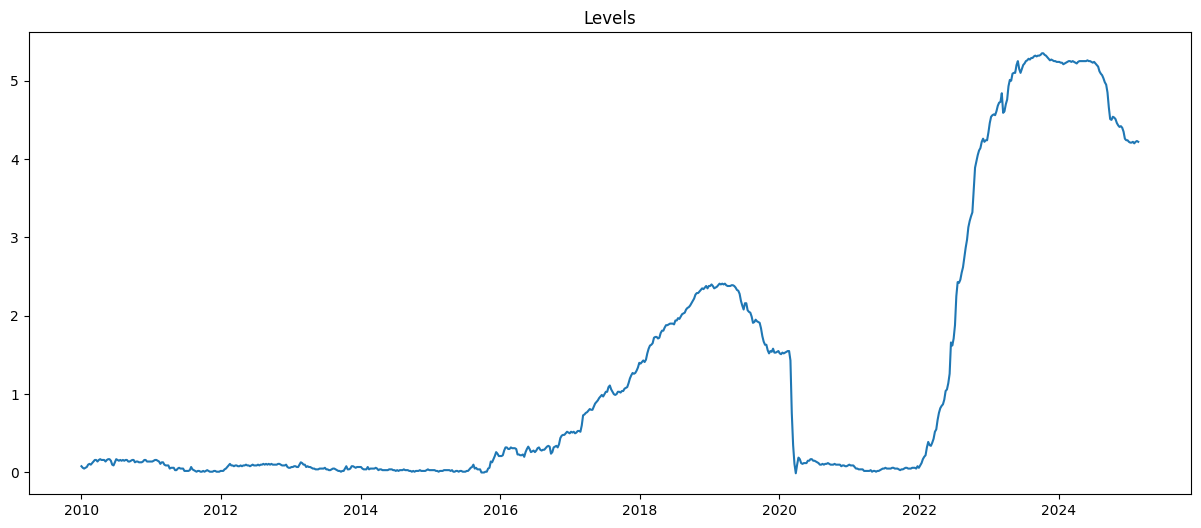

In [5]:
# исходный ряд
fig, ax = plt.subplots(1,1,figsize=(15,6))

ax.plot(y)
ax.set_title('Levels')

plt.show()

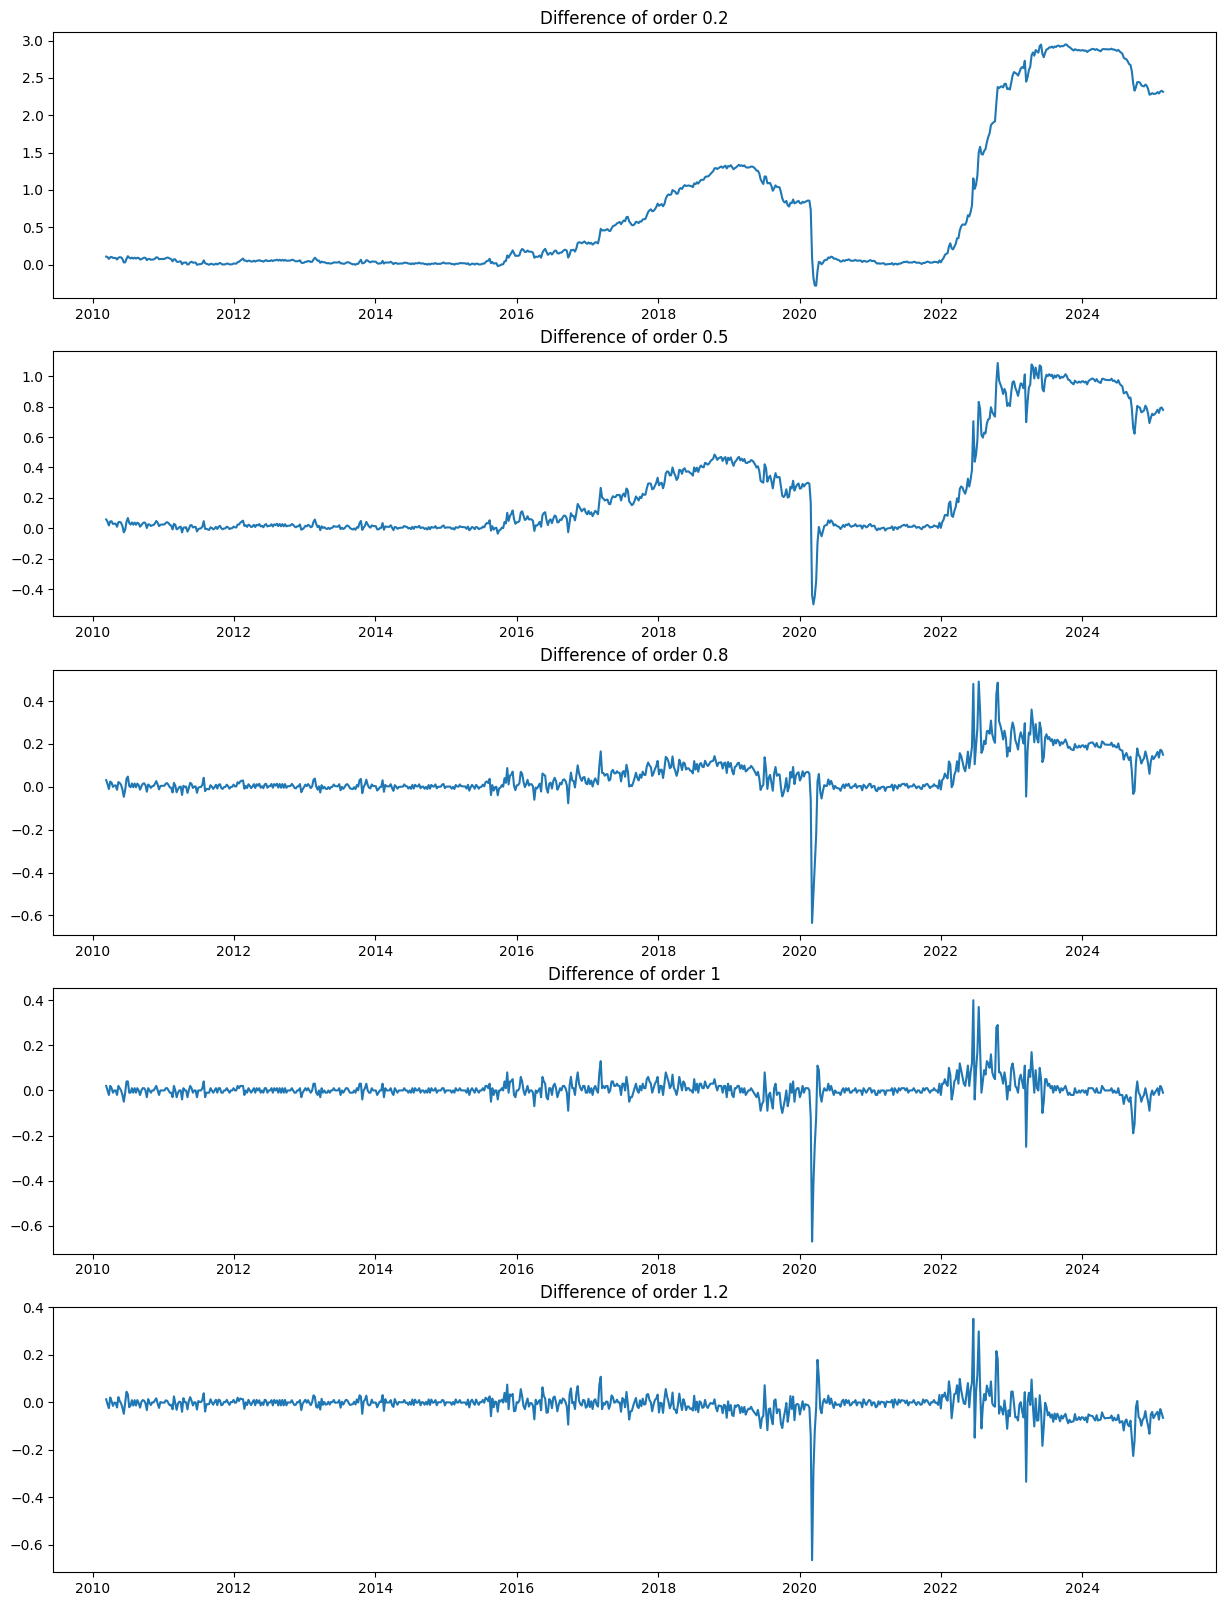

In [6]:
differences=[0.2, 0.5, 0.8, 1, 1.2]
win_size = 10

# исходный ряд
fig, axs = plt.subplots(len(differences),1,figsize=(15,4*len(differences)))

for i in range(len(differences)):
	axs[i].plot(ts_differencing(y, differences[i], win_size))
	axs[i].set_title(f'Difference of order {differences[i]}')

plt.show()
